# **Colab環境使用Keras深度學習模型訓練Cifar10資料集**
## 資料來源:

# **Import Library**

In [ ]:
# Simple CNN model for the CIFAR-10 Dataset
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# **資料準備**

In [ ]:
(X_img_train, y_label_train), (X_img_test, y_label_test) = cifar10.load_data()
print("train data:",'images:',X_img_train.shape," labels:",y_label_train.shape) 
print("test  data:",'images:',X_img_test.shape ," labels:",y_label_test.shape) 

170500096/170498071 [==============================] - 4s 0us/step
train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [ ]:
X_img_train_normalize = X_img_train.astype('float32') / 255.0
X_img_test_normalize = X_img_test.astype('float32') / 255.0

In [ ]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [ ]:
y_label_test_OneHot.shape

(10000, 10)

#**建立模型**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [ ]:
model = Sequential()

#**卷積層1與池化層1**

In [ ]:
model.add(Conv2D(filters=32,kernel_size=(3, 3),input_shape=(32, 32,3),activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#**卷積層2與池化層2**

In [ ]:
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#**卷積層3與池化層3**

In [ ]:
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#**建立神經網路(平坦層、隱藏層、輸出層)**

In [ ]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

# **載入之前訓練的模型**

In [ ]:
try:
    model.load_weights("SaveModel/cifarCnnModelnew.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# **訓練模型**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
train_history=model.fit(X_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=1, batch_size=300, verbose=1)     

134/134 [==============================] - 5s 40ms/step - loss: 2.0994 - accuracy: 0.1719 - val_loss: 2.0120 - val_accuracy: 0.2074


In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

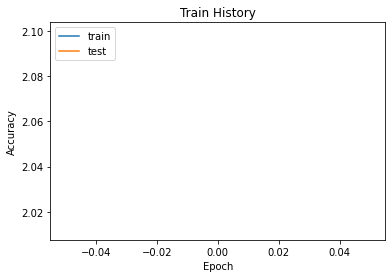

In [ ]:
show_train_history('loss','val_loss')

# **評估模型準確率**

In [ ]:
scores = model.evaluate(X_img_test_normalize, 
                        y_label_test_OneHot,verbose=0)
scores[1]

0.20900000631809235

# **進行預測**

In [ ]:
prediction=model.predict_classes(X_img_test_normalize)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
prediction[:10]

array([4, 1, 9, 1, 4, 4, 7, 4, 4, 9])

In [ ]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [ ]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

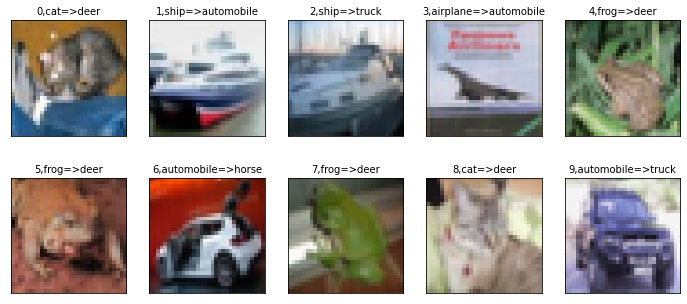

In [ ]:
plot_images_labels_prediction(X_img_test_normalize,y_label_test,prediction,0,10)

# **查看預測機率**

In [ ]:
Predicted_Probability=model.predict(X_img_test_normalize)

In [ ]:
def show_Predicted_Probability(X_img,Predicted_Probability,i):
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(X_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

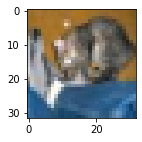

airplane Probability:0.010095071
automobile Probability:0.003448687
bird Probability:0.167703643
cat Probability:0.146765739
deer Probability:0.214417279
dog Probability:0.164500862
frog Probability:0.169491753
horse Probability:0.115377776
ship Probability:0.002661195
truck Probability:0.005538007


In [ ]:
show_Predicted_Probability(X_img_test,Predicted_Probability,0)

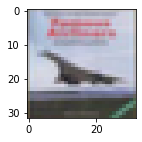

airplane Probability:0.188471302
automobile Probability:0.218772918
bird Probability:0.051521081
cat Probability:0.025530342
deer Probability:0.031741671
dog Probability:0.021245116
frog Probability:0.016660785
horse Probability:0.031846218
ship Probability:0.201247409
truck Probability:0.212963089


In [ ]:
show_Predicted_Probability(X_img_test,Predicted_Probability,3)

# **Save model to JSON**

In [ ]:
model_json = model.to_json()
with open("cifarCnnModelnew.json", "w") as json_file:
    json_file.write(model_json)

#**Json檔案存到雲端硬碟**

# **Save Weight to h5**

In [ ]:
model.save_weights("cifarCnnModelnew.h5")
print("Saved model to disk")

Saved model to disk
